### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [200]:

data.columns
data.isnull()
## CarryAway column has blank values

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


3. Decide what to do about your missing data -- drop, replace, other...

In [201]:
# fill the carry away column blank values with 'Notsure'
data["CarryAway"] = data["CarryAway"].fillna("NotSure")
#data["CarryAway"].value_counts()


In [206]:
# Bar column is having string values that creates problem during querying
data["Bar"] = data["Bar"].str.replace('~','-')
data["Bar"] = data["Bar"].str.replace('less1','0')

# age column is having string value in case of integer 

data["age"] =data["age"].str.replace('50plus','51')
data["age"] =data["age"].str.replace('below21','20')
data["passanger"] =data["passanger"].str.replace('(s)','s')

#RestaurantLessThan20 having special characters that needs clean up 
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].str.replace('~','-')
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].str.replace('less1','0')

#Income column has formatting issue 
data["income"] = data["income"].str.replace('Less than $12500','$12499')
data["income"] = data["income"].str.replace('$100000 or More','$100001')


4. What proportion of the total observations chose to accept the coupon? 



In [203]:
Yes_to_Coupon = data[data['Y'] ==1]["Y"].sum()
Total = data.shape[0]
Proportion = Yes_to_Coupon/Total
print("Proportion Accepted the coupon :" + str(Proportion))

Proportion Accepted the coupon :0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

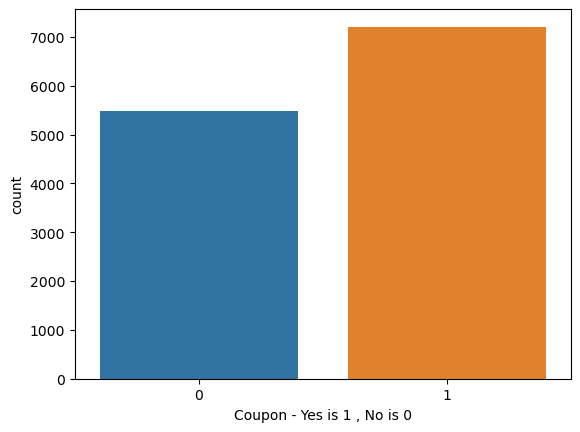

In [188]:
sns.countplot(data,x="Y")
plt.xlabel('Coupon - Yes is 1 , No is 0')
plt.show()

<Axes: xlabel='Y'>

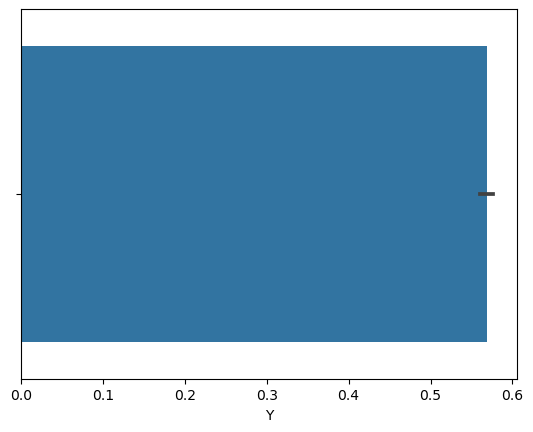

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

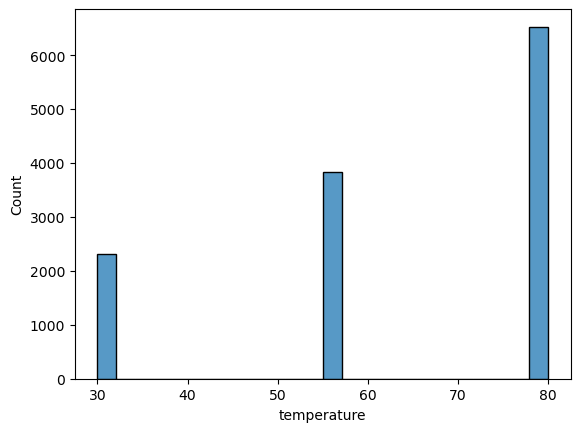

In [189]:
sns.histplot(data,x='temperature')

In [190]:
data["coupon"].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [207]:
barData = data[data["coupon"]=='Bar']
barData

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kids,Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NotSure,4-8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NotSure,4-8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NotSure,4-8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friends,Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4-8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4-8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friends,Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4-8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friends,Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4-8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4-8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4-8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [192]:
BarCoupon= barData.shape[0]
AcceptedBarCoupon = barData[barData['Y'] ==1]["Y"].sum()
Ans1 = AcceptedBarCoupon/BarCoupon
print(Ans1)

0.41001487357461575


<Axes: xlabel='Y', ylabel='count'>

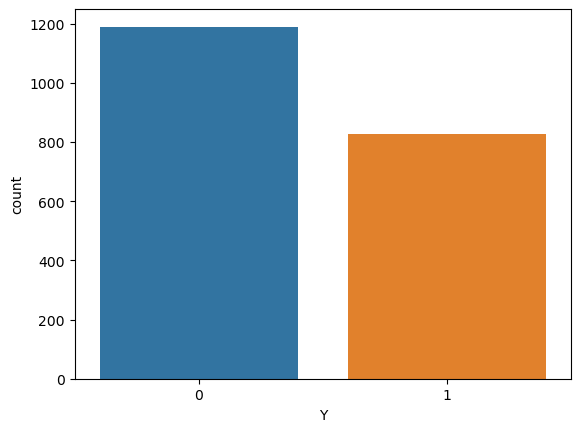

In [233]:
sns.countplot(barData,x="Y")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [193]:
# Query : 
barData["Bar"].value_counts()

Bar
never    830
0        570
1-3      397
4-8      150
gt8       49
Name: count, dtype: int64

In [194]:
barData.query('Bar == "1-3" and Y == 1' )
Lessthan3 = barData.query('Bar == "1-3" and Y == 1' ).shape[0]
Morethan3 = barData.query('(Bar == "4-8" or Bar == "gt8" )and Y ==1' ).shape[0]
Ans = Lessthan3/Morethan3
#print(Lessthan3)
#print(Morethan3)
print(Ans)

1.6797385620915033


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [195]:
# change the data type of age to integer
barData['age'] = barData[['age']].apply(pd.to_numeric)

Ageover25 = barData.query('(Bar == "4-8" or Bar == "gt8" or  Bar == "1-3") and Y==1 and age > 25' ).shape[0]
Agebelow25 = barData.query('(Bar == "4-8" or Bar == "gt8" or  Bar == "1-3") and Y==1 and age <= 25' ).shape[0]
print(Ageover25)
print(Agebelow25)
AcceptanceComparator = Ageover25/Agebelow25
print('AcceptanceComparator ' + str(AcceptanceComparator))

292
118
AcceptanceComparator 2.4745762711864407


C:\Users\prem_\AppData\Local\Temp\ipykernel_40008\1215252255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barData['age'] = barData[['age']].apply(pd.to_numeric)


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [196]:
#barData['passanger'].value_counts()
#barData['occupation'].value_counts()

Oarray = ['Farming Fishing & Forestry']
Parray = ['Kids']
visit  = ['4-8','gt8','1-3']
set1 = barData.query('(Bar == "4-8" or Bar == "gt8" or  Bar == "1-3") and Y==1 and passanger not in @parray and occupation not in @Oarray'  ).shape[0]
set2 = barData.query('Bar not in @visit  and Y==1 and passanger in @parray and occupation in @Oarray'  ).shape[0]

print(set1)
print(set2)

157
3


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [211]:
# barData['maritalStatus'].value_counts()
barData['age'] = barData[['age']].apply(pd.to_numeric)
Marray =['Widowed']
RestVisit = ['4-8','gt8']
Salless50k = ['$12500 - $24999','$37500 - $49999','$12499']
set3 = barData.query('Bar in @visit  and Y==1 and passanger not in @parray and maritalStatus not in @Marray'  ).shape[0]
set4 = barData.query('Bar in @visit  and Y==1 and age < 30'  ).shape[0]
set5 = barData.query('RestaurantLessThan20 in @RestVisit  and Y==1 and income in @Salless50k'  ).shape[0]
print(set3)
print(set4)
print(set5)

157
249
123


C:\Users\prem_\AppData\Local\Temp\ipykernel_40008\1021243832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barData['age'] = barData[['age']].apply(pd.to_numeric)


In [208]:
barData['income'].value_counts()

income
$25000 - $37499    318
$100001            291
$12500 - $24999    288
$37500 - $49999    267
$50000 - $62499    262
$12499             165
$75000 - $87499    151
$87500 - $99999    145
$62500 - $74999    130
Name: count, dtype: int64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [213]:
print ('Majority of drivers who accepted the bar coupons do not have kids as passengers')

Drivers who accepted the bar coupons do not have kids as passengers


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [216]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [218]:
CoffeeData = data[data["coupon"]=='Coffee House']
CoffeeData

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friends,Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NotSure,4-8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friends,Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NotSure,4-8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friends,Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NotSure,4-8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kids,Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NotSure,4-8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NotSure,4-8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4-8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4-8,1~3,1,1,0,0,1,0


<Axes: xlabel='destination', ylabel='count'>

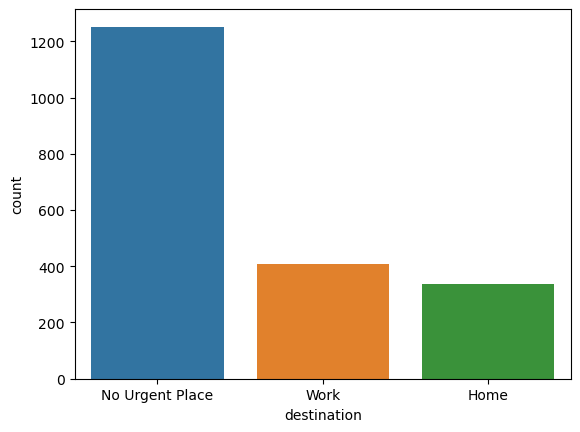

In [224]:
sns.countplot(CoffeeData.query("Y==1"),x='destination')

In [230]:
# CoffeeData.query("Y==1").groupby(['occupation'])['Y'].count()
CoffeeData.groupby(['occupation','Y'])['Y'].count()

occupation                                 Y
Architecture & Engineering                 0     28
                                           1     35
Arts Design Entertainment Sports & Media   0    103
                                           1    106
Building & Grounds Cleaning & Maintenance  0      3
                                           1      8
Business & Financial                       0     76
                                           1     70
Community & Social Services                0     48
                                           1     26
Computer & Mathematical                    0    223
                                           1    226
Construction & Extraction                  0     24
                                           1     22
Education&Training&Library                 0    167
                                           1    129
Farming Fishing & Forestry                 0      5
                                           1      6
Food Preparation & 

In [231]:
print('Coffee house coupons are accepted more when the destination is not an urgent place')

Coffee house coupons are accepted more when the destination is not an urgent place
